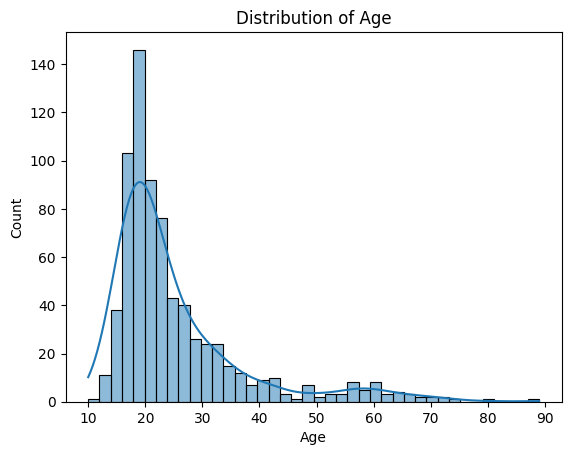

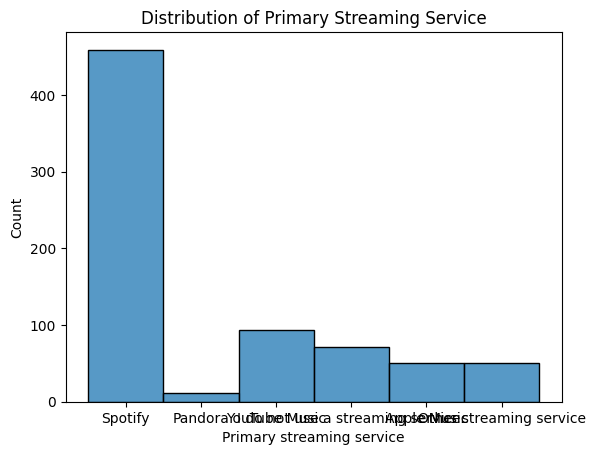

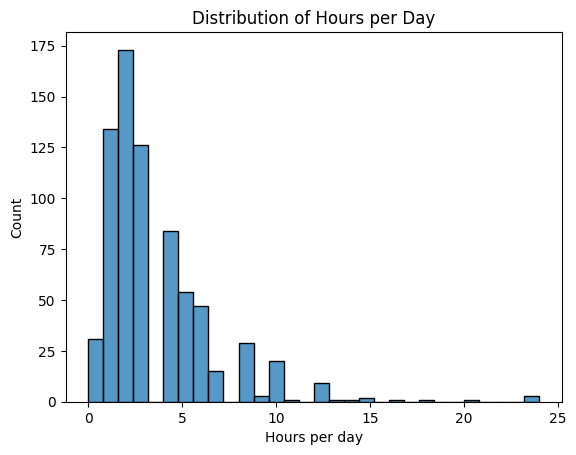

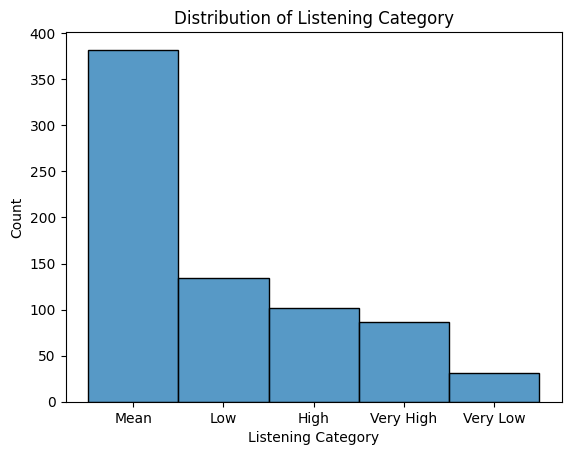

In [4]:
#Analisi Dati
# This script performs data analysis on the MMH survey results dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
mxmh = pd.read_csv("../data/mxmh_survey_results.csv")

# Clean data from useless and ridodant columns
# and check for missing values
mxmh.isnull().sum()
mxmh = mxmh.drop(columns=["Timestamp", "Permissions", "BPM", "Music effects"])
mxmh["Age"] = mxmh["Age"].fillna(mxmh["Age"].mean())
mxmh["Primary streaming service"] = mxmh["Primary streaming service"].fillna("Spotify")

# Save the cleaned dataset
mxmh.to_csv("mxmh_clean.csv", index=False)


def listener_categories(h):
    if h < 1:
        return "Very Low"
    elif 1 <= h < 2:
        return "Low"
    elif 2 <= h < 4.5:
        return "Mean"
    elif 4.5 <= h < 6.5:
        return "High"
    elif h >= 6:
        return "Very High"
    
mxmh["Listening Category"] = mxmh["Hours per day"].apply(listener_categories)

    
# Plotting the distribution of age
sns.histplot(mxmh["Age"], kde=True, bins=40)
plt.title("Distribution of Age")
plt.show()

# Plotting the distribution of primary streaming service
sns.histplot(mxmh["Primary streaming service"], kde=False, bins=30)
plt.title("Distribution of Primary Streaming Service")
plt.show()

# Plotting the distribution of Hours per day
sns.histplot(mxmh["Hours per day"], kde=False, bins=30)
plt.title("Distribution of Hours per Day")
plt.show()

# Plotting the distribution of Listening Category
sns.histplot(mxmh["Listening Category"], kde=False, bins=30)
plt.title("Distribution of Listening Category")
plt.show()